In [1]:
#Participants
#QYLD
#QQQ
#VIXM

#Package
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Read excel file
file_path = r'D:\Derivatives Trading\QYLD Research.xlsx'
df = pd.read_excel(file_path, index_col='Date', parse_dates=True)

In [2]:
# Normalize prices to start at 100 for better comparison
normalized_prices = df / df.iloc[0] * 100


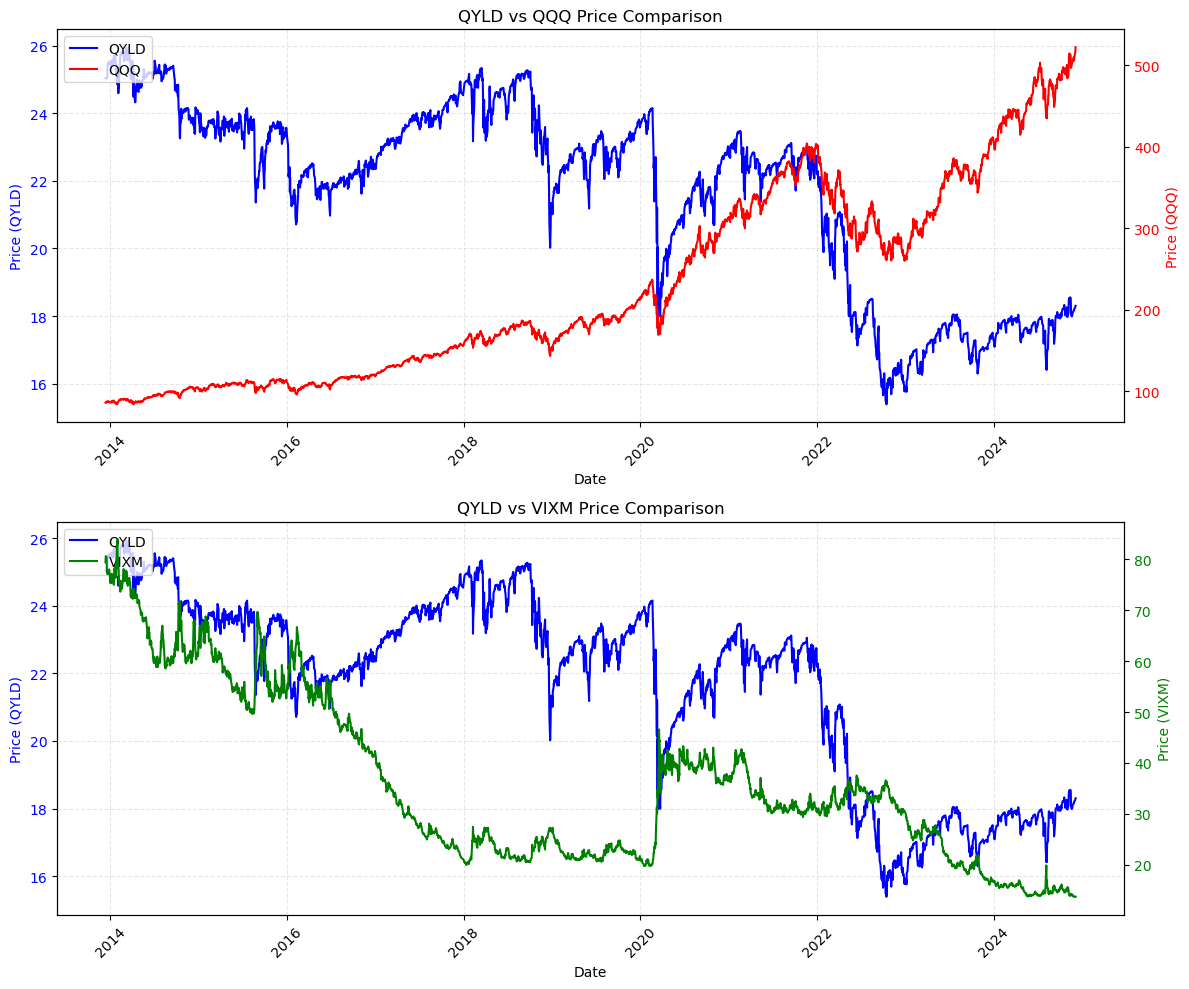

In [3]:
# Create figure with two subplots
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(12, 10))

# Top subplot: QYLD vs QQQ
color1 = 'blue'
color2 = 'red'

# Plot QYLD on left axis
ax1.plot(df.index, df['QYLD'], label='QYLD', color=color1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (QYLD)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create second axis for QQQ
ax2 = ax1.twinx()
ax2.plot(df.index, df['QQQ'], label='QQQ', color=color2)
ax2.set_ylabel('Price (QQQ)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Combine legends for top plot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Bottom subplot: QYLD vs VIXM
color3 = 'green'

# Plot QYLD on left axis
ax3.plot(df.index, df['QYLD'], label='QYLD', color=color1)
ax3.set_xlabel('Date')
ax3.set_ylabel('Price (QYLD)', color=color1)
ax3.tick_params(axis='y', labelcolor=color1)

# Create second axis for VIXM
ax4 = ax3.twinx()
ax4.plot(df.index, df['VIXM'], label='VIXM', color=color3)
ax4.set_ylabel('Price (VIXM)', color=color3)
ax4.tick_params(axis='y', labelcolor=color3)

# Combine legends for bottom plot
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax3.legend(lines3 + lines4, labels3 + labels4, loc='upper left')

# Set titles and adjust layout
ax1.set_title('QYLD vs QQQ Price Comparison')
ax3.set_title('QYLD vs VIXM Price Comparison')

# Rotate x-axis labels
ax1.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)

# Add grids
ax1.grid(True, linestyle='--', alpha=0.3)
ax3.grid(True, linestyle='--', alpha=0.3)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show plot
plt.show()



In [4]:
############################################################
# Calculate daily returns
returns = df.pct_change().dropna()

# Prepare data for regression
X = returns[['QQQ', 'VIXM']]  # Independent variables
y = returns['QYLD']           # Dependent variable

# Add constant to independent variables for regression intercept
X = sm.add_constant(X)

# Run OLS regression
model = sm.OLS(y, X).fit()

# Get regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   QYLD   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     2969.
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:09:06   Log-Likelihood:                 10534.
No. Observations:                2758   AIC:                        -2.106e+04
Df Residuals:                    2755   BIC:                        -2.104e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -4.880      0.0

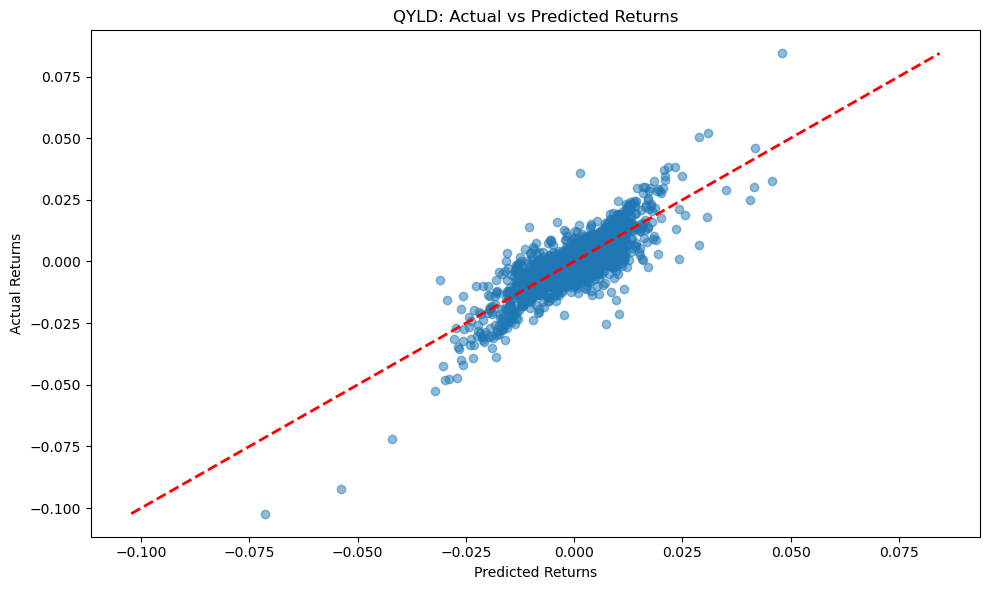

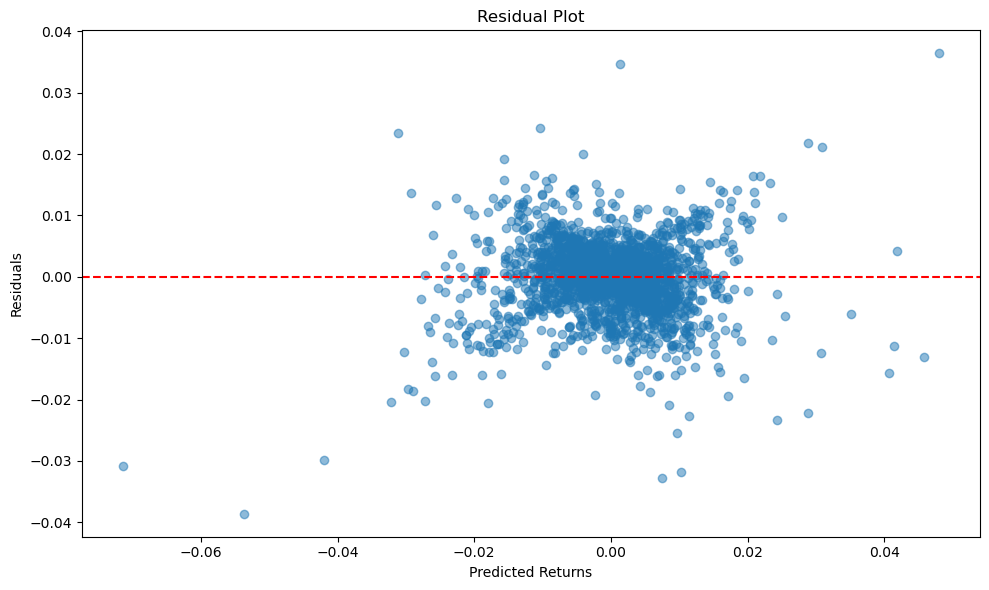

In [6]:
# Extract key metrics
coefficients = model.params
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj

# Calculate predicted values and residuals
predicted_values = model.predict(X)
residuals = y - predicted_values

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, y, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Predicted Returns')
plt.ylabel('Actual Returns')
plt.title('QYLD: Actual vs Predicted Returns')
plt.tight_layout()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Returns')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()